In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [6]:
country_df = pd.read_csv('data/Country-data.csv', index_col=0)
country_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


child_mort = Death of children under 5 years of age per 1000 live births

exports = Exports of goods and services per capita. Given as % of the GDP per capita.

health = Total health spending per capita. Given as % of GDP per capita.

imports = Imports of goods and services per capita. Given as % of GDP per capita.

income = Net income per person

inflation = The measurements of the annual growth rate of the Total GDP

life_expec = The average number of years a newborn child would live if the current mortality patterns are to remain the same

total_fer = The number of children that would be born to each woman if the current age-fertility rates remain the same

gdpp = The GDP per capita. Calculated as the Total GDP divided by the total population.

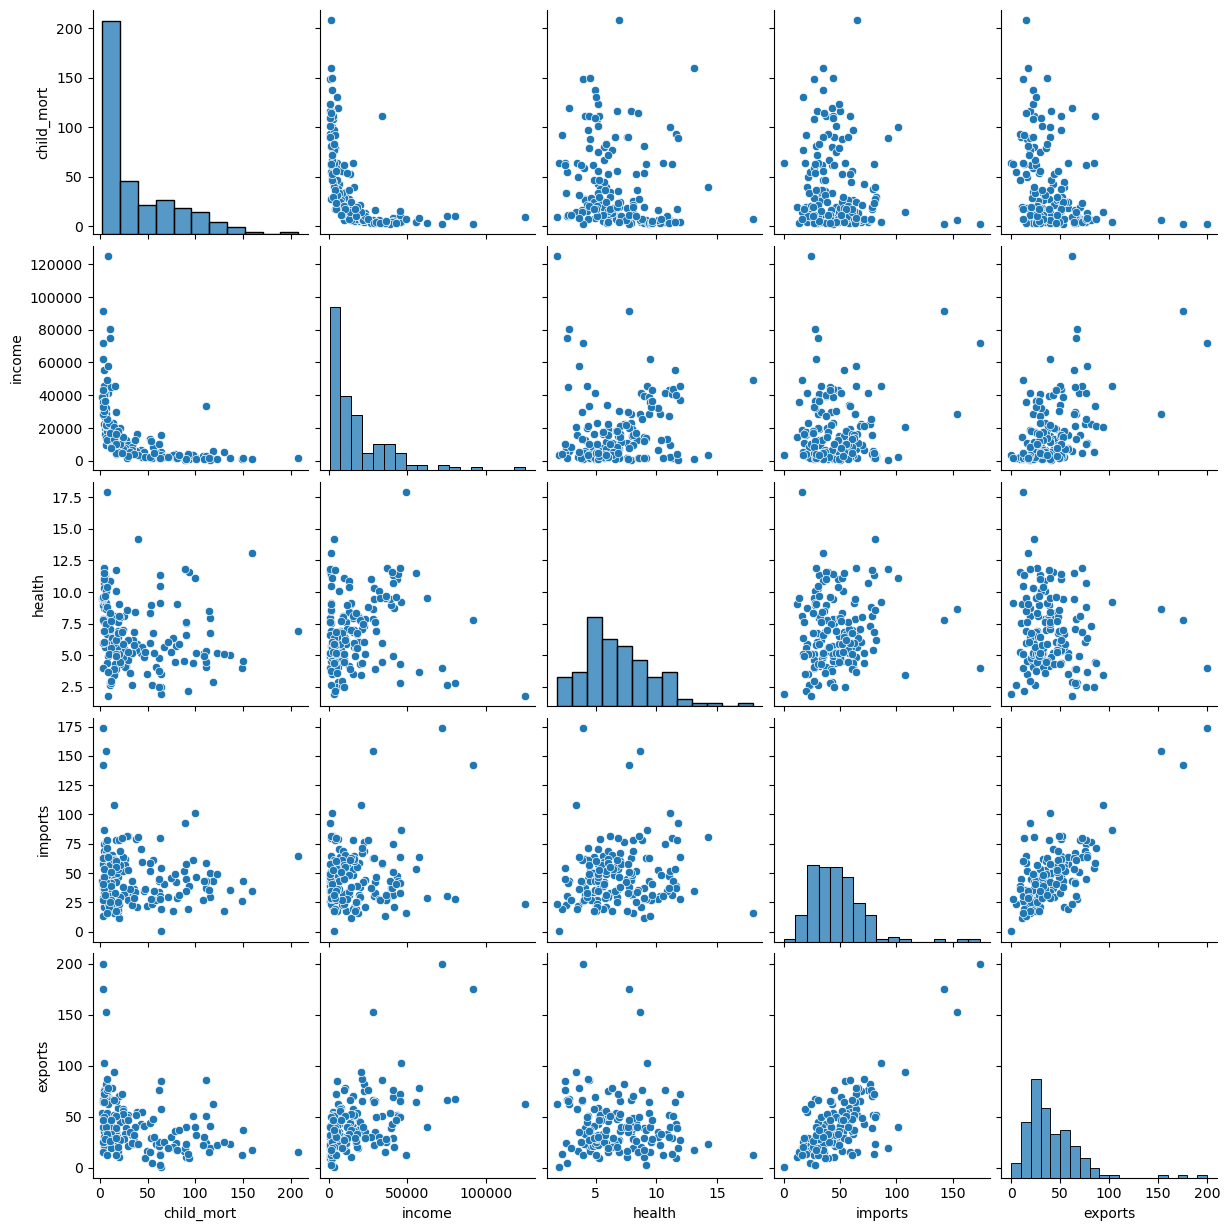

In [7]:
sns.pairplot(country_df[["child_mort","income","health","imports","exports"]])

Noticeable trends are:

child_mort vs income

imports vs exports

child_mort vs exports

health vs income

child_mort vs health

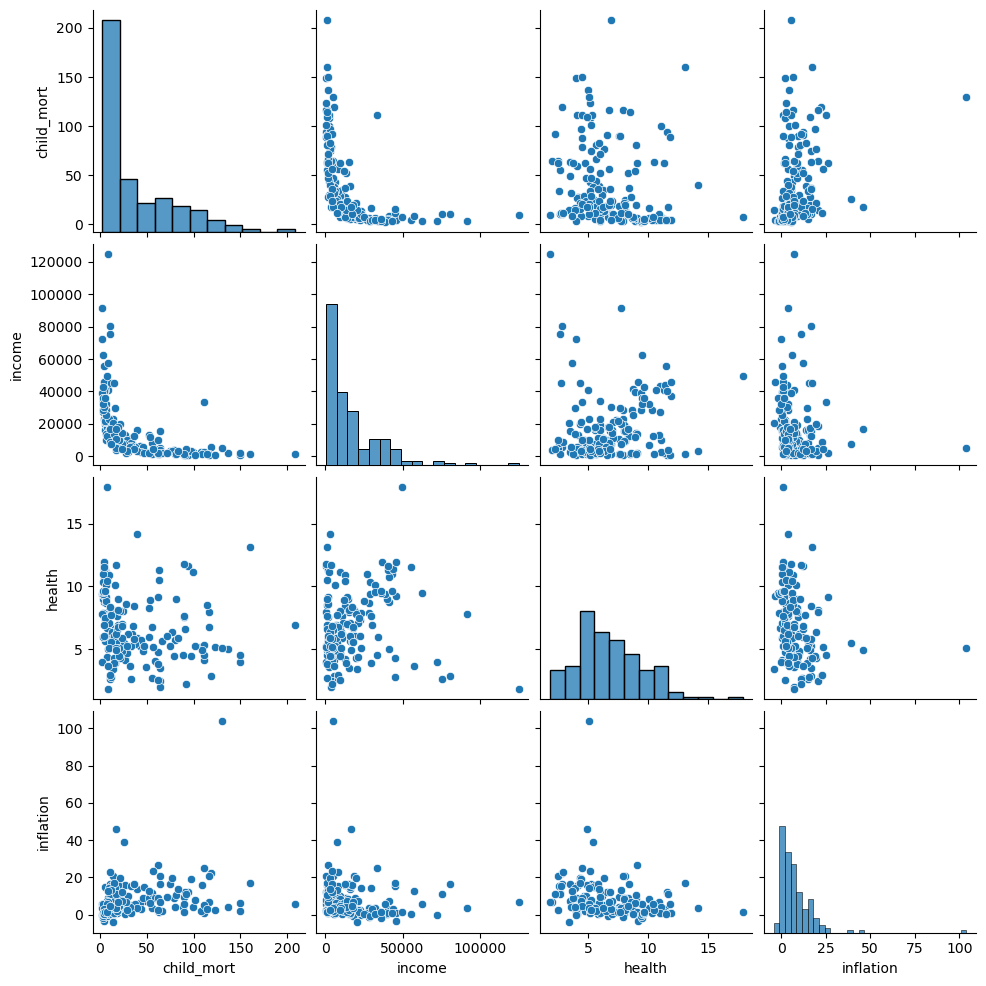

In [8]:
sns.pairplot(country_df[["child_mort","income","health","inflation"]])

income decreases as inflation increases

Strongest correlation is child_mort vs income

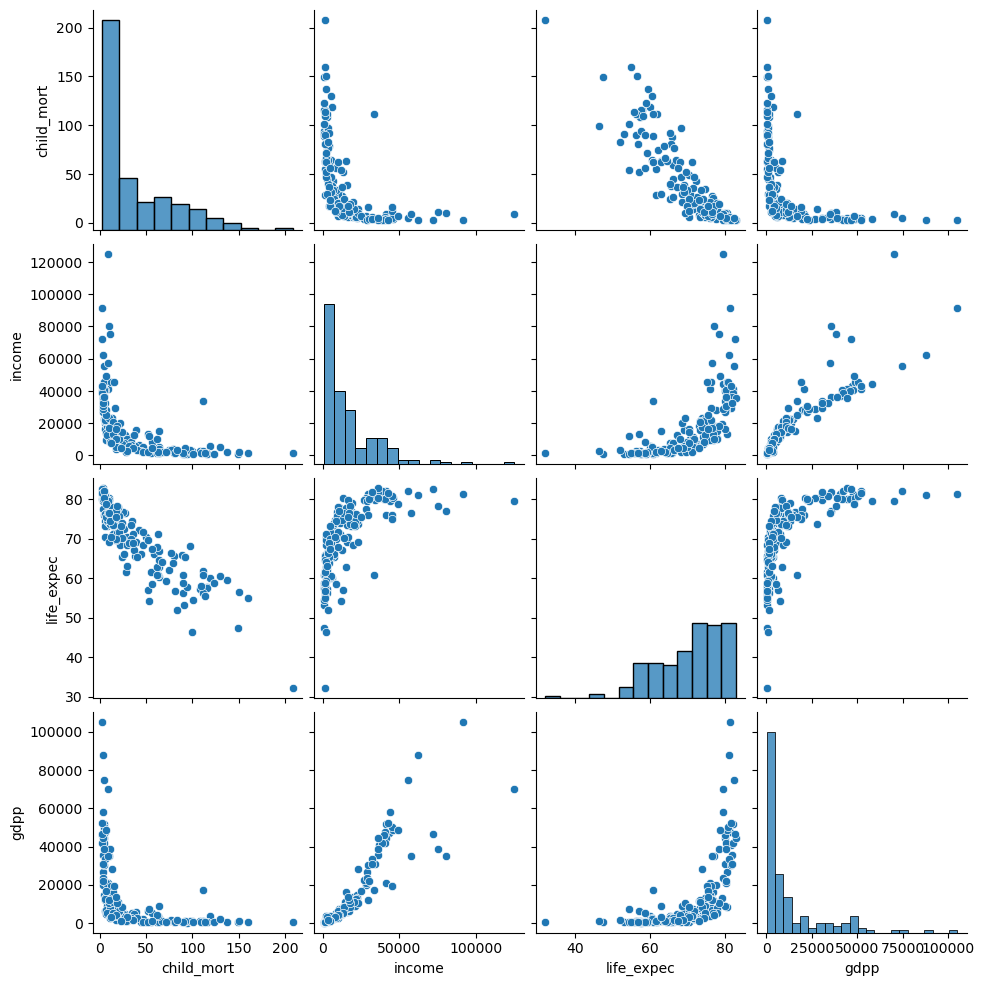

In [9]:
sns.pairplot(country_df[["child_mort","income","life_expec","gdpp"]])

child_mort decreases as gdpp increases strongly

income increases as gdpp increases

life_expec increases as gdpp increases

<Axes: >

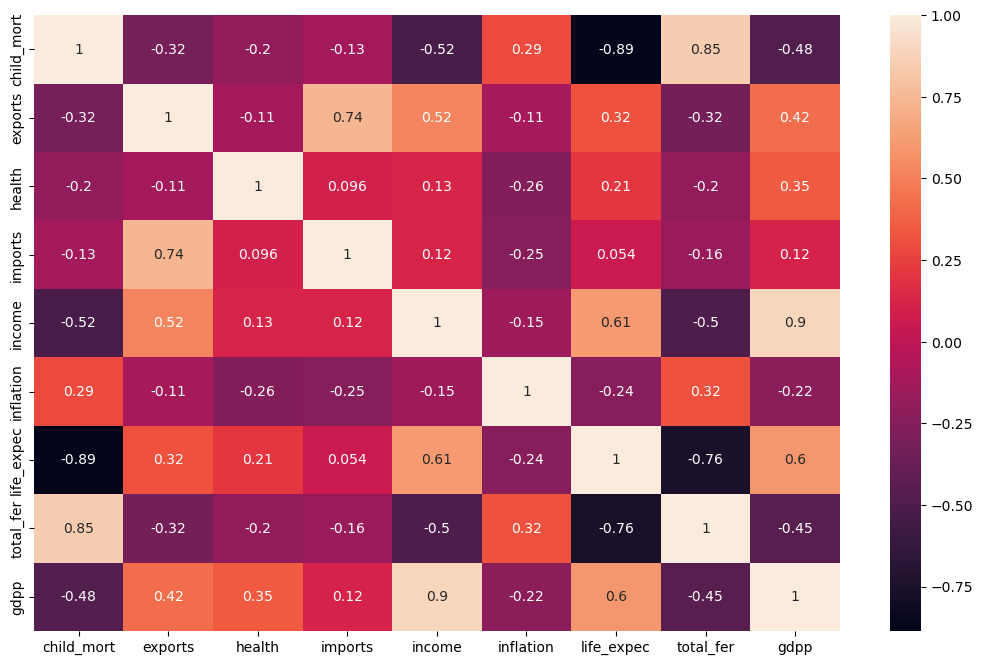

In [10]:
plt.figure(figsize=(13,8))
sns.heatmap(country_df.corr(), annot=True)

In [11]:
country_df[(country_df["income"]<country_df["income"].quantile(0.05))
           &(country_df["child_mort"]>country_df["child_mort"].quantile(0.95))]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
Niger,123.0,22.2,5.16,49.1,814,2.55,58.8,7.49,348


Based off of this and knowing that there are strong correlations between income, gdpp, and child mortality, Central African Republic needs the most help

In [12]:
country_df[(country_df["income"]<country_df["income"].quantile(0.05))
           &(country_df["life_expec"]<country_df["life_expec"].quantile(0.05))]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419


In [14]:
country_df[(country_df["gdpp"]<country_df["gdpp"].quantile(0.05))
           &(country_df["life_expec"]<country_df["life_expec"].quantile(0.05))]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Central African Republic,149.0,11.8,3.98,26.5,888,2.01,47.5,5.21,446
Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
Mozambique,101.0,31.5,5.21,46.2,918,7.64,54.5,5.56,419
Sierra Leone,160.0,16.8,13.10,34.5,1220,17.20,55.0,5.20,399


These results also follow that Central African Republic consistently needs the most help.